<a href="https://colab.research.google.com/github/IshaanKulkarni/makemore/blob/master/makemore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving names.txt to names.txt


In [ ]:
words=open('names.txt','r').read().splitlines()

In [ ]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [ ]:
len(words)

32033

In [ ]:
# Bigram language model: Working with only 2 characters at a time. Simple language model
b={}
for w in words:
  chs=['<S>']+ list(w) + ['<E>']
  for ch1,ch2 in zip(chs,chs[1:]):
    bigram=(ch1,ch2)
    b[bigram]=b.get(bigram,0)+1

In [ ]:
sorted(b.items(),key=lambda kv:-kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [ ]:
# Model building starts
import torch

In [ ]:
N=torch.zeros((27,27), dtype=torch.int32)

In [ ]:
# . indicates start and end of words. Characters following dot and characters whom the dot follows make for good starting and ending character choices
chars=sorted(list(set(''.join(words))))
# indexing of charcaters to integers 1 to 26. Special character (dot) takes the index of 0
stoi={s:i+1 for i,s in enumerate(chars)}
stoi['.']=0

In [ ]:

# Here, we map the frequency of the occurence of each bigram in a 2d array created as a tensor using torch.
for w in words:
  chs=['.']+ list(w) + ['.']
  for ch1,ch2 in zip(chs,chs[1:]):
    ix1=stoi[ch1]
    ix2=stoi[ch2]
    N[ix1,ix2]+=1

In [ ]:
N

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

In [ ]:
# We create another mapping this time from integers to the characters. Basically inverse of stoi
itos={i:s for s,i in stoi.items()}

(-0.5, 26.5, 26.5, -0.5)

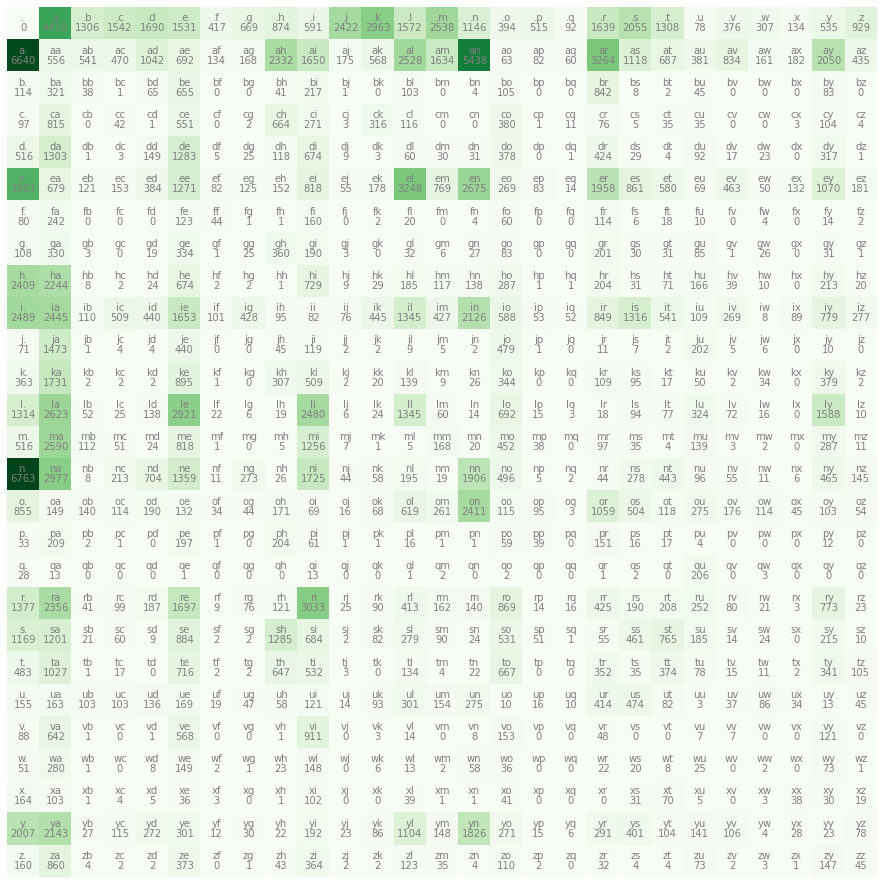

In [ ]:
# To visualize the frequency of bigrams in our data
import matplotlib.pyplot as plt 
%matplotlib inline


plt.figure(figsize=(16,16))
plt.imshow(N,cmap='Greens')
for i in range(27):
  for j in range(27):
    chstr=itos[i]+itos[j]
    plt.text(j,i,chstr,ha="center",va="bottom",color="gray")
    plt.text(j,i,N[i,j].item(),ha="center",va="top",color="gray")

plt.axis('off')

In [ ]:
# This shows the occurences of our 26 letters as the first character in our dataset
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [ ]:
# Normalized probablities of occurence of each character in the first position
p=N[0].float()
p=p/p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [ ]:
P=N.float()

In [ ]:
P.shape

torch.Size([27, 27])

In [ ]:
P.sum(1,keepdim=True)

tensor([[32033.],
        [33885.],
        [ 2645.],
        [ 3532.],
        [ 5496.],
        [20423.],
        [  905.],
        [ 1927.],
        [ 7616.],
        [17701.],
        [ 2900.],
        [ 5040.],
        [13958.],
        [ 6642.],
        [18327.],
        [ 7934.],
        [ 1026.],
        [  272.],
        [12700.],
        [ 8106.],
        [ 5570.],
        [ 3135.],
        [ 2573.],
        [  929.],
        [  697.],
        [ 9776.],
        [ 2398.]])

In [ ]:
# Brodcasting semantics: Check out torch documentation. They describe what tensor operations are possible and what are not
P/=P.sum(1,keepdim=True)

In [ ]:
# torch.multinomial creates a dataset of numbers corresponding to a given probablity distribution. Generator object helps us make the predictions deterministic as long as the
# seed is agreed upon
g=torch.Generator().manual_seed(2147483647)
for i in range(100):
  out=[]
  ix=0
  while True:
    p=P[ix]
    ix=torch.multinomial(p,num_samples=1,replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix==0:
      break

  print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.
h.
br.
a.
jayn.
ilemannariaenien.
be.
f.
akiinela.
trttanakeroruceyaaxatona.
lamoynayrkiedengin.
torrederahnn.
ellovyllobrpin.
a.
wai.
kn.
jaieendenelele.
kianu.
eryly.
zeeieil.
kayvirgiynenn.
r.
t.
rja.
kronanurolin.
din.
elfr.
dikie.
s.
elarieiavelvalllaish.
eythann.
janianaeri.
ble.
ckiree.
l.
adgenoena.
naisaryan.
sialaitalyee.
cena.
lisarr.
bizyngor.
eve.
biahish.
tovih.
al.
an.
amulileron.
jar.
ran.
erelezio.
ahistorarieneibrodaiazindiah.
lssthmi.
havanajey.
g.
pee.
gre.
ga.
taashellestroulyirrydany.
rrartar.
liala.
leleanaiai.
manni.
aumobh.
i.
k.
mirvekliyiy.
n.
alinaiyn.
mionde.
ma.
rskelier.
men.
o.
br.
vihilun.
lis.
belioeyoniussadomenaba.
jo.
e.
dar.
stlaelivinteyast.
an.
ionn.
kratly.
maynllsan.
h.
r.
my.
rykenayl.
kyalileyl.
xia.


In [ ]:
# The only way to convince ourselves that this is better is to generate names using uniform probablity. Those turn out to be absoulte rubbish

In [ ]:
# Now, we will define the quality of this model using a loss function. The research in NLP shows that the best metric is likelihood which is the product of all probablities for a word and all its bigrams in the training set.
# This number should be as high as possible.
# Example follows below. 

In [ ]:
loglike=0.0
n=0.0
for w in words:
  chs=['.']+ list(w) + ['.']
  for ch1,ch2 in zip(chs,chs[1:]):
    ix1=stoi[ch1]
    ix2=stoi[ch2]
    prob=P[ix1,ix2]
    logprob=torch.log(prob)
    loglike+=logprob
    n+=1
    # print(f'{ch1}{ch2}:{prob:.4f} {logprob: .4f}')

print(f'{loglike=}')
nll=-loglike
print(f'{nll=}')
anll=nll/n 
print(f'{anll=}')

loglike=tensor(-559891.7500)
nll=tensor(559891.7500)
anll=tensor(2.4541)


In [ ]:
# If you look at the probablities that the model is assigning to these bigrams, you realize that they should be close to 1 as this word already exists in the dataset. 
# Thus, to define this performance, we use the measure oflog-liklihood.
# Average nll= nll/count
# Our goal is to maximize likelihood. That is minimizing the negative log likelihood and the anll (average negative log likelihood).